In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

### Import Data

In [2]:
# data can be found at https://urban.jrc.ec.europa.eu/#/en/download
gdp = pd.read_csv('EUROSTAT_gdp.csv')
pop = pd.read_csv('JRC_ARDECO-DEMO_2020_population.csv')

In [3]:
gdp.head()

,NUTS_CODE,NUTS_LEVEL,UNIT,2000,2001,2002,2003,2004,2005,2006,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,AT,0,MIO_EUR,213606.48,220525.08,226735.22,231862.46,242348.26,254075.03,267824.45,...,293761.91,288044.02,295896.64,310128.66,318653.04,323910.20,333146.07,344258.51,356237.59,369899.17
1,BE,0,MIO_EUR,258222.00,265788.40,275065.10,282636.50,298710.80,311480.80,326662.10,...,354065.90,348781.10,365100.50,379106.30,387500.10,392339.80,400086.60,411010.20,424660.30,439051.90
2,BG,0,MIO_EUR,14305.83,15784.30,17343.64,18654.00,20931.96,23852.65,27210.91,...,37200.05,37317.66,38230.52,41292.04,41947.24,41858.11,42824.44,45288.46,48128.64,51663.02
3,CY,0,MIO_EUR,10804.59,11602.93,12082.95,12871.33,13937.98,15039.29,16263.84,...,19006.18,18673.53,19299.51,19730.98,19489.72,18140.49,17609.98,17746.02,18490.20,19570.92
4,CZ,0,MIO_EUR,66838.76,75387.72,87055.06,88249.14,96028.47,109627.66,123943.19,...,161313.12,148682.01,156718.24,164040.46,161434.33,157741.65,156659.97,168473.29,176370.13,191721.76


In [4]:
pop.head()

,NUTS_CODE,NUTS_LEVEL,UNIT,indic,1980,1981,1982,1983,1984,1985,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AT,0,KHAB,RNPTD,7549.430,7568.71,7574.140,7561.910,7561.430,7564.98,...,8426.31,8477.23,8543.93,8629.52,8739.81,8795.07,8837.71,8881.002,8923.662,8965.623
1,BE,0,KHAB,RNPTD,9859.000,9858.00,9856.000,9854.000,9855.000,9857.00,...,11067.80,11125.00,11179.80,11238.50,11295.00,11349.10,11403.70,11458.693,11516.607,11574.814
2,DE,0,KHAB,RNPTD,61566.000,61682.00,61638.000,61423.000,61175.000,61024.00,...,80426.00,80646.00,80983.00,81687.00,82349.00,82657.00,82906.00,83111.029,83283.544,83430.225
3,DK,0,KHAB,RNPTD,5124.000,5122.00,5118.000,5114.000,5111.000,5113.00,...,5591.00,5613.00,5643.00,5682.00,5729.00,5767.00,5794.00,5819.000,5843.000,5866.372
4,EL,0,KHAB,RNPTD,9642.505,9729.35,9789.513,9846.627,9895.801,9934.30,...,11045.04,10965.24,10892.37,10820.96,10775.99,10754.70,10727.56,10670.028,10610.462,10551.030


In [5]:
# note that units of gdp and population are MIO_EUR (million euros) and KHAB (thousand habitants)

### Merge dataframes for year 2017

In [6]:
df = gdp[['NUTS_CODE','2017']].merge(pop[['NUTS_CODE','2017']], on='NUTS_CODE')
df.head()

,NUTS_CODE,2017_x,2017_y
0,AT,369899.17,8795.07
1,BE,439051.90,11349.10
2,BG,51663.02,7075.95
3,CY,19570.92,859.52
4,CZ,191721.76,10589.53


In [7]:
df.shape

(34, 3)

In [8]:
# reassign column names
df.columns = ['Country', 'gdp_2017', 'pop_2017']
df.head()

,Country,gdp_2017,pop_2017
0,AT,369899.17,8795.07
1,BE,439051.90,11349.10
2,BG,51663.02,7075.95
3,CY,19570.92,859.52
4,CZ,191721.76,10589.53


### Remove NaNs

In [9]:
df.isna().sum()

Country     0
gdp_2017    1
pop_2017    0
dtype: int64

In [10]:
df[df['gdp_2017'].isna()]

,Country,gdp_2017,pop_2017
28,NO,NaN,5277.0


In [11]:
# We observe Norway has a missing GDP value so we will remove Norway from dataset

In [12]:
df = df.dropna()
df.head()

,Country,gdp_2017,pop_2017
0,AT,369899.17,8795.07
1,BE,439051.90,11349.10
2,BG,51663.02,7075.95
3,CY,19570.92,859.52
4,CZ,191721.76,10589.53


In [13]:
df.shape

(33, 3)

### Create Lorenz and gini Function

In [14]:
def lorenz(df, x_var, y_var):
    """
    This function creates lorenz plot and calculates the gini coefficient. Gini coefficient is 
    calculated by dividing the area between the two curves over the area under the ideal curve.
    Function does not return anything.
    """
      
    data = df.copy()
    data['slope'] = data[y_var]/data[x_var]
    
    plt.figure(figsize=(8,6))
    
    X = 100*np.cumsum(data.sort_values('slope')[x_var])/data[x_var].sum()
    Y = 100* np.cumsum(data.sort_values('slope')[y_var])/data[y_var].sum()
    
    plt.plot(X,Y,label='Observed')
    plt.plot(np.linspace(0,100,2),np.linspace(0,100,2),
             linestyle='dashed',
             color='grey',
             label='Ideal Distribution')

    plt.xlabel(f'% {x_var}')
    plt.ylabel(f'% {y_var}')
    plt.title('Lorenz Curve')
    plt.legend()
    
    area_under_ideal = np.trapz(np.linspace(0,100,2),np.linspace(0,100,2))
    area_under_lorenz = np.trapz(Y,X)
    net_area = area_under_ideal - area_under_lorenz
    gini_coeff = net_area / area_under_ideal
    
    plt.annotate(text=f'gini_coeff: {gini_coeff:.2f}', xy = (15,65), fontsize=14)
    plt.show()

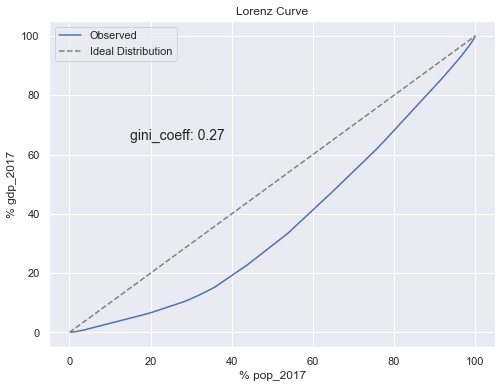

In [15]:
lorenz(df,'pop_2017','gdp_2017')